In [150]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_1samp
from scipy.stats import shapiro, norm
from scipy.stats import wilcoxon
import plotly.express as px 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
lrm = LinearRegression()



## Analyzing DataSet

In [151]:
#Export the dataset
Exp_and_Imp = pd.read_csv('import_and_export.csv')

In [152]:
# Visualize the fist 5 records and rows 
Exp_and_Imp.head()

,location,category,flow,measure,Unit,Date,Value
0,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2012,69.379
1,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2013,67.734
2,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2014,79.710
3,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2015,77.666
4,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2016,76.376


In [153]:
#the data has 60 rows and 7 columns
Exp_and_Imp.shape

(60, 7)

In [154]:
#Info of the features 
Exp_and_Imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  60 non-null     object 
 1   category  60 non-null     object 
 2   flow      60 non-null     object 
 3   measure   60 non-null     object 
 4   Unit      60 non-null     object 
 5   Date      60 non-null     int64  
 6   Value     60 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 3.4+ KB


In [155]:
# types of the data
Exp_and_Imp.dtypes

location     object
category     object
flow         object
measure      object
Unit         object
Date          int64
Value       float64
dtype: object

# EDA

In [156]:
# Unique values for each column 
Exp_and_Imp.nunique(axis = 0)

location     3
category     1
flow         2
measure      1
Unit         1
Date        10
Value       60
dtype: int64

In [157]:
# drop the column
Exp_and_Imp = Exp_and_Imp.drop(['Unit'],axis=1) 
Exp_and_Imp.head() 


,location,category,flow,measure,Date,Value
0,Ireland,Construction,Exports,US Dollars at current prices in millions,2012,69.379
1,Ireland,Construction,Exports,US Dollars at current prices in millions,2013,67.734
2,Ireland,Construction,Exports,US Dollars at current prices in millions,2014,79.710
3,Ireland,Construction,Exports,US Dollars at current prices in millions,2015,77.666
4,Ireland,Construction,Exports,US Dollars at current prices in millions,2016,76.376


In [158]:
# Renaming the column names 

Exp_and_Imp = Exp_and_Imp.rename(columns={"Date":"Year","location":"Country"})
Exp_and_Imp.head()


,Country,category,flow,measure,Year,Value
0,Ireland,Construction,Exports,US Dollars at current prices in millions,2012,69.379
1,Ireland,Construction,Exports,US Dollars at current prices in millions,2013,67.734
2,Ireland,Construction,Exports,US Dollars at current prices in millions,2014,79.710
3,Ireland,Construction,Exports,US Dollars at current prices in millions,2015,77.666
4,Ireland,Construction,Exports,US Dollars at current prices in millions,2016,76.376


In [159]:
Exp_and_Imp.shape 

(60, 6)

In [160]:
# Check for duplicates
duplicate_rows_df= Exp_and_Imp[Exp_and_Imp.duplicated()] 
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 6)


In [161]:
# Print the null values
print(Exp_and_Imp.isnull().sum()) 


Country     0
category    0
flow        0
measure     0
Year        0
Value       0
dtype: int64


In [162]:
#There are not null values
Exp_and_Imp.isnull().values.any()

False

In [163]:
Exp_and_Imp.count()

Country     60
category    60
flow        60
measure     60
Year        60
Value       60
dtype: int64

## Descriptive Statistics 

In [164]:
#Central tendency of the numerical values
Exp_and_Imp.describe() 

,Year,Value
count,60.00000,60.000000
mean,2016.50000,2180.134800
std,2.89652,1461.661048
min,2012.00000,67.734000
25%,2014.00000,979.252250
50%,2016.50000,2315.629000
75%,2019.00000,3161.097500
max,2021.00000,5437.156000


In [165]:
# Summary of my categorical data 
Exp_and_Imp.describe(include=object) 

,Country,category,flow,measure
count,60,60,60,60
unique,3,1,2,1
top,Ireland,Construction,Exports,US Dollars at current prices in millions
freq,20,60,30,60


## EDA- Plots to illustrate findings 

Text(0.5, 1.0, 'Box plot Value')

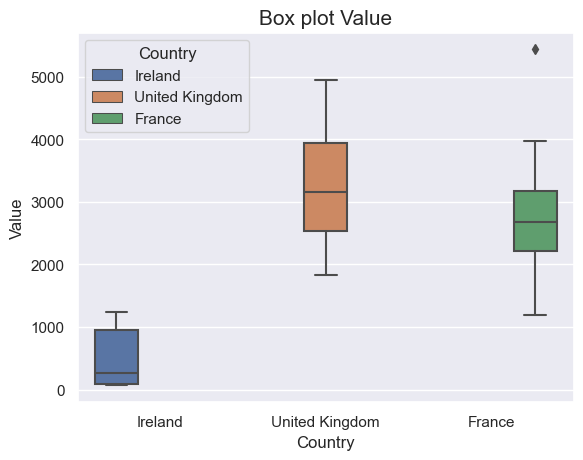

In [166]:
# Boxplot of the Column "Country"
sns.boxplot(x = 'Country', y ='Value',
            data=Exp_and_Imp, hue = 'Country')
plt.title('Box plot Value',
          fontsize=15)

In [167]:
#Corrlation of the numerical values
correlation = Exp_and_Imp.corr()
print(correlation)

           Year     Value
Year   1.000000  0.136626
Value  0.136626  1.000000


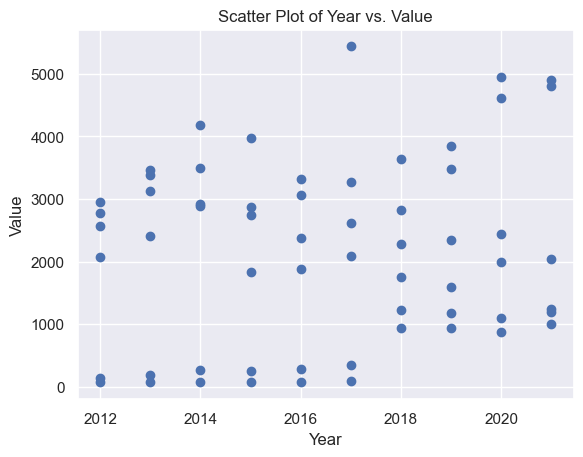

In [168]:

# Plotting the data
plt.scatter(Exp_and_Imp['Year'], Exp_and_Imp['Value'])
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Scatter Plot of Year vs. Value')
plt.show()


In [169]:
# Filter the data to only include imports and exports
data = Exp_and_Imp[Exp_and_Imp['flow'].isin(['Imports', 'Exports'])]

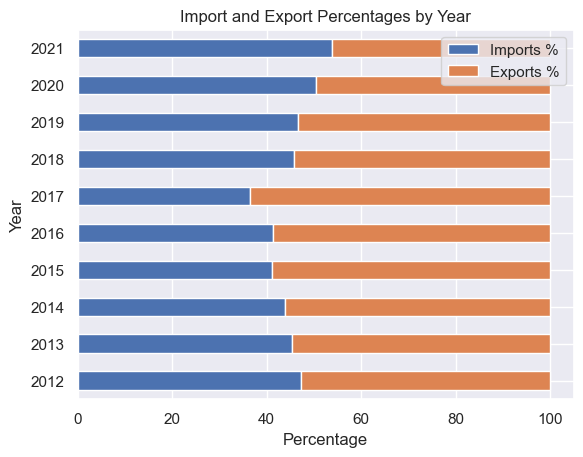

In [170]:
# Pivot the data to create a new DataFrame with years as columns and flows as rows
pivot_data = data.pivot_table(index='Year', columns= ['flow'], values='Value')
pivot_data['Total'] = pivot_data['Imports'] + pivot_data['Exports'] 
pivot_data['Imports %'] = pivot_data['Imports'] / pivot_data['Total'] * 100
pivot_data['Exports %'] = pivot_data['Exports'] / pivot_data['Total'] * 100

pivot_data = data.pivot_table(index='Year', columns='flow', values='Value')
pivot_data['Total'] = pivot_data['Imports'] + pivot_data['Exports']
pivot_data['Imports %'] = pivot_data['Imports'] / pivot_data['Total'] * 100
pivot_data['Exports %'] = pivot_data['Exports'] / pivot_data['Total'] * 100

# Create a horizontal stacked bar chart
pivot_data[['Imports %', 'Exports %']].plot(kind='barh', stacked=True)

# Add labels to the plot
plt.xlabel('Percentage')
plt.ylabel('Year')
plt.title('Import and Export Percentages by Year')
plt.legend(loc='upper right')
plt.show()

## Normal distribution 

In [171]:
#Extracting the column 'Value'
values = Exp_and_Imp['Value']
# check if the data comes from a normal distribution using the Shapiro-Wilk test
stat, p = shapiro(values)
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('The data comes from a normal distribution')
else:
    print('The data does not come from a normal distribution')


Shapiro-Wilk Test: Statistics=0.956, p=0.029
The data does not come from a normal distribution


In [172]:
# generate a normal distribution with the same mean and standard deviation as the dat 
mu, std = norm.fit(values)
print('Mean: %.2f, Standard Deviation: %.2f' % (mu, std))

Mean: 2180.13, Standard Deviation: 1449.43


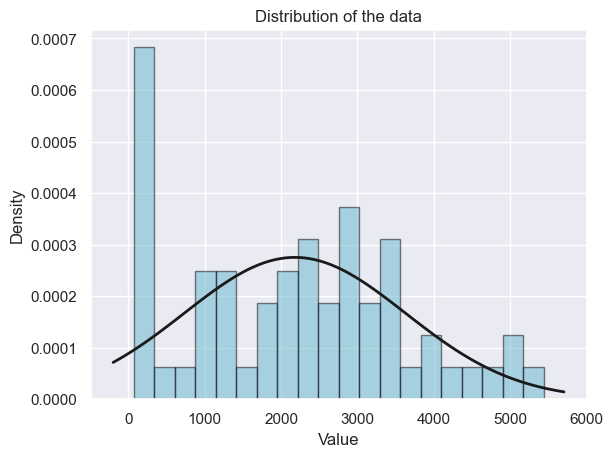

In [173]:
#  Distribution of the data
plt.hist(values, bins=20, density=True, edgecolor='black', color='c', alpha=0.50)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of the data')
plt.show()

## Non parametric 

## Wilcoxon.

In [174]:
# Group the data by country
grouped_data = data.groupby("Country")

# Perform the Wilcoxon signed-rank test for each country
for country, group in grouped_data:
    # Extract the construction export values for each year
    values_2017 = group[group["Year"] == 2017]["Value"]
    values_2018 = group[group["Year"] == 2018]["Value"]
    values_2019 = group[group["Year"] == 2019]["Value"]
    values_2020 = group[group["Year"] == 2020]["Value"]
    values_2021 = group[group["Year"] == 2021]["Value"]
    
    # Perform the Wilcoxon signed-rank test for each pair of years
    _, p_value_2017_2018 = wilcoxon(values_2017, values_2018)
    _, p_value_2018_2019 = wilcoxon(values_2018, values_2019)
    _, p_value_2019_2020 = wilcoxon(values_2019, values_2020)
    _, p_value_2020_2021 = wilcoxon(values_2020, values_2021)
    
    # Print the p-values for each pair of years
    print(country)
    print("2017-2018: p =", p_value_2017_2018)
    print("2018-2019: p =", p_value_2018_2019)
    print("2019-2020: p =", p_value_2019_2020)
    print("2020-2021: p =", p_value_2020_2021)
    print("\n")


France
2017-2018: p = 0.5
2018-2019: p = 1.0
2019-2020: p = 0.5
2020-2021: p = 1.0


Ireland
2017-2018: p = 0.5
2018-2019: p = 0.5
2019-2020: p = 0.5
2020-2021: p = 0.5


United Kingdom
2017-2018: p = 0.5
2018-2019: p = 0.5
2019-2020: p = 0.5
2020-2021: p = 1.0




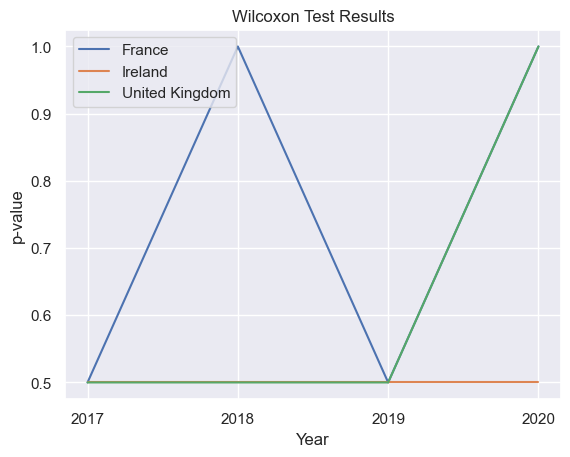

In [175]:
# Graph of the results
# Define x-axis values (years)
years = [2017, 2018, 2019, 2020]

# Set the x-axis ticks to display as whole numbers
plt.xticks(years, [int(year) for year in years])

# Define y-axis values for each country
france = [0.5, 1.0, 0.5, 1.0]
ireland = [0.5, 0.5, 0.5, 0.5]
uk = [0.5, 0.5, 0.5, 1.0]

# Create the line graph
plt.plot(years, france, label='France')
plt.plot(years, ireland, label='Ireland')
plt.plot(years, uk, label='United Kingdom')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('p-value')
plt.title('Wilcoxon Test Results')
plt.legend()

# Show the graph
plt.show()


## Wilcoxon Imports

In [176]:
# Subset the data to only include construction imports
imports_of_construction = Exp_and_Imp[Exp_and_Imp['category'] == 'Construction'][Exp_and_Imp['flow'] == 'Imports']

# Subset the data to only include Ireland and the United Kingdom
ie_uk_importsonly = imports_of_construction[(imports_of_construction['Country'] == 'Ireland') | (imports_of_construction['Country'] == 'United Kingdom')]

# Pivot the data to have Ireland and the United Kingdom as columns and years as rows
uk_ie_table = pd.pivot_table(ie_uk_importsonly, values='Value', index='Year', columns='Country')


In [177]:
# Run the Wilcoxon test
stat, p = wilcoxon(uk_ie_table['Ireland'], uk_ie_table['United Kingdom'])

print("Wilcoxon test results:")
print("Statistical test statistic:", stat)
print("p-value:", p)

Wilcoxon test results:
Statistical test statistic: 0.0
p-value: 0.001953125


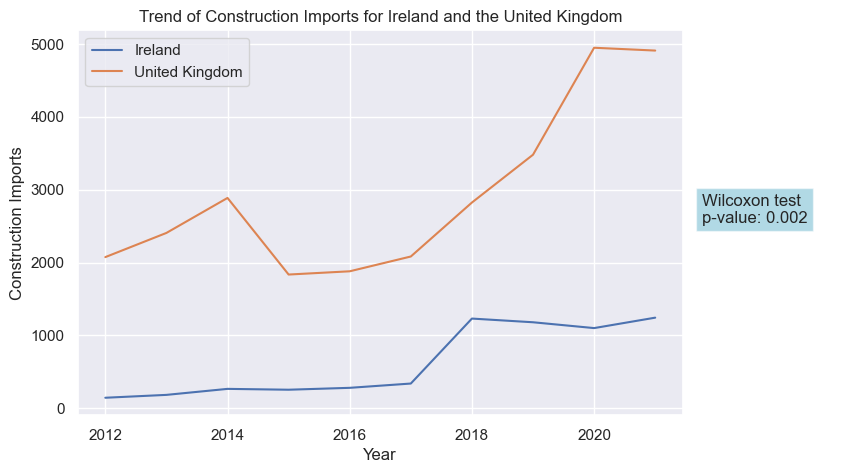

In [178]:
import matplotlib.gridspec as gridspec

# Create a frid 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5), gridspec_kw={'width_ratios': [4, 1]})

# Plot the data on the first subplot
ax1.plot(uk_ie_table.index, uk_ie_table['Ireland'], label='Ireland')
ax1.plot(uk_ie_table.index, uk_ie_table['United Kingdom'], label='United Kingdom')

# Add labels and annotations
ax1.set_xlabel('Year')
ax1.set_ylabel('Construction Imports')
ax1.set_title('Trend of Construction Imports for Ireland and the United Kingdom')
ax1.legend()

# Add the text box on the second subplot
ax2.text(0, 0.5, 'Wilcoxon test\np-value: {:.3f}'.format(p), bbox=dict(facecolor='c', alpha=0.50))
ax2.axis('off')

# Adjust the spacing between the subplots
fig.subplots_adjust(wspace=0.05)

# Show the plot
plt.show()


## The Kruskal-Wallis Test

In [179]:
# Group the features
group1 = Exp_and_Imp[Exp_and_Imp['Country'] == 'Ireland']['Value']
group2 = Exp_and_Imp[Exp_and_Imp['Country'] == 'France']['Value']
group3 = Exp_and_Imp[Exp_and_Imp['Country'] == 'United Kingdom']['Value']

In [180]:

# Perform the one-way ANOVA test:
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=60.142825868875015, pvalue=9.020614453578871e-15)

## Turkey-Kramer

In [181]:
# Perform Tukey-Kramer Analysis:
tukey = pairwise_tukeyhsd(endog=Exp_and_Imp['Value'],
                          groups=Exp_and_Imp['Country'],
                          alpha=0.05)

#display results
print(tukey)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
 group1     group2      meandiff  p-adj    lower      upper    reject
---------------------------------------------------------------------
 France        Ireland -2221.9458    0.0 -2863.6088 -1580.2828   True
 France United Kingdom   535.6849 0.1193   -105.978  1177.3479  False
Ireland United Kingdom  2757.6307    0.0  2115.9678  3399.2937   True
---------------------------------------------------------------------


## Parametric test

In [182]:
#Check for skweeness
Exp_and_Imp.agg(['skew', 'kurtosis']).transpose()

C:\Users\Sandr\AppData\Local\Temp\ipykernel_14536\2162880223.py:2: FutureWarning:

['Country', 'category', 'flow', 'measure'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



,skew,kurtosis
Year,0.000000,-1.225665
Value,0.182142,-0.767445


In [183]:
from scipy.stats import boxcox

# Box-Cox Transformation in Python
transformed_data, lambda_value = boxcox(Exp_and_Imp.iloc[:, 5])
Exp_and_Imp.insert(len(Exp_and_Imp.columns), 'A_Boxcox', transformed_data)


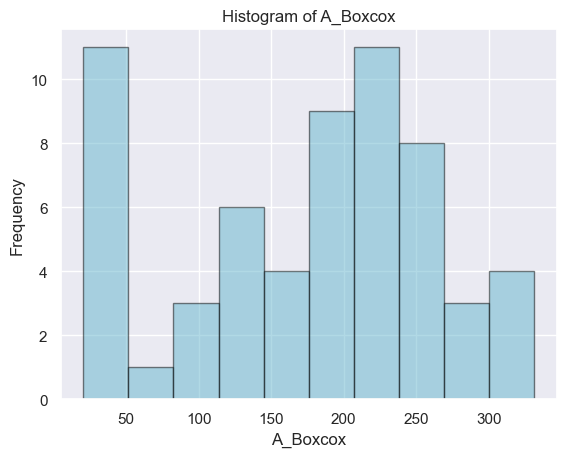

In [184]:

# Plot histogram
plt.hist(Exp_and_Imp['A_Boxcox'], bins=10, edgecolor='black', color='c',alpha=0.50)

# Add labels and title
plt.xlabel('A_Boxcox')
plt.ylabel('Frequency')
plt.title('Histogram of A_Boxcox')

# Show the plot
plt.show()


In [185]:

# Apply Shapiro-Wilk test
stat, p = shapiro(Exp_and_Imp['A_Boxcox'])
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('The data comes from a normal distribution')
else:
    print('The data does not come from a normal distribution')


Shapiro-Wilk Test: Statistics=0.942, p=0.007
The data does not come from a normal distribution


In [186]:

# Perform Z-score scaling (Standardization)
scaler = StandardScaler()
normalized_data_zscore = scaler.fit_transform(Exp_and_Imp[['Value']])

# Print the normalized data
print("Normalized data (Z-score scaling):\n", normalized_data_zscore)


Normalized data (Z-score scaling):
 [[-1.45626676]
 [-1.45740169]
 [-1.44913913]
 [-1.45054934]
 [-1.45143934]
 [-1.44489884]
 [-0.86046332]
 [-0.86230611]
 [-0.90286483]
 [-0.81787346]
 [-1.40485549]
 [-1.37768342]
 [-1.32081966]
 [-1.32883799]
 [-1.31092198]
 [-1.27031427]
 [-0.65514045]
 [-0.69007075]
 [-0.74525867]
 [-0.64651291]
 [ 0.26796421]
 [ 0.82668341]
 [ 1.38394961]
 [ 0.47643522]
 [ 0.60392954]
 [ 0.74862924]
 [ 1.00968991]
 [ 1.15361345]
 [ 1.67395409]
 [ 1.81424102]
 [-0.073159  ]
 [ 0.1558049 ]
 [ 0.48710011]
 [-0.23821361]
 [-0.20743667]
 [-0.06740846]
 [ 0.44359678]
 [ 0.8964688 ]
 [ 1.90923703]
 [ 1.88256308]
 [ 0.5354964 ]
 [ 0.88283861]
 [ 0.90460787]
 [ 1.23323237]
 [ 0.78538577]
 [ 2.24710585]
 [ 0.0683767 ]
 [ 0.11858543]
 [ 0.18461831]
 [-0.67833716]
 [ 0.4131717 ]
 [ 0.65284672]
 [ 0.50681752]
 [ 0.38584302]
 [ 0.13549208]
 [ 0.30017137]
 [-0.29256741]
 [-0.40120948]
 [-0.12507805]
 [-0.10142185]]


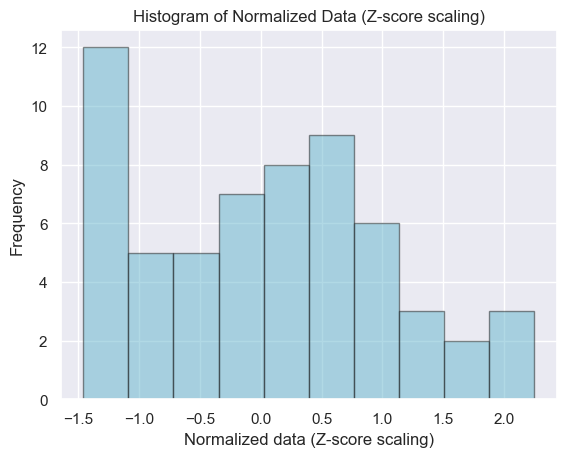

In [187]:

# Plot histogram
plt.hist(normalized_data_zscore, bins=10, color='c', edgecolor='k', alpha=0.50)

# Add labels and title
plt.xlabel('Normalized data (Z-score scaling)')
plt.ylabel('Frequency')
plt.title('Histogram of Normalized Data (Z-score scaling)')

# Show the plot
plt.show()


In [188]:
# Apply Shapiro-Wilk test
stat, p = shapiro(normalized_data_zscore)
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('The data follows a normal distribution after Z-score scaling')
else:
    print('The data does not follow a normal distribution after Z-score scaling')

Shapiro-Wilk Test: Statistics=0.956, p=0.029
The data does not follow a normal distribution after Z-score scaling


## One-sample t-test

In [189]:

# Perform one-sample t-test
t_stat, p_val = ttest_1samp(Exp_and_Imp['Value'], 0)

alpha = 0.05
if p_val > alpha:
    print("Data is not significantly from zero(the null hypothes cannot be rejected).")
else:
    print("Data is significantly different from zero (the null hypothesis can be rejected).")


Data is significantly different from zero (the null hypothesis can be rejected).


Text(0.5, 1.0, 'Histogram of Values')

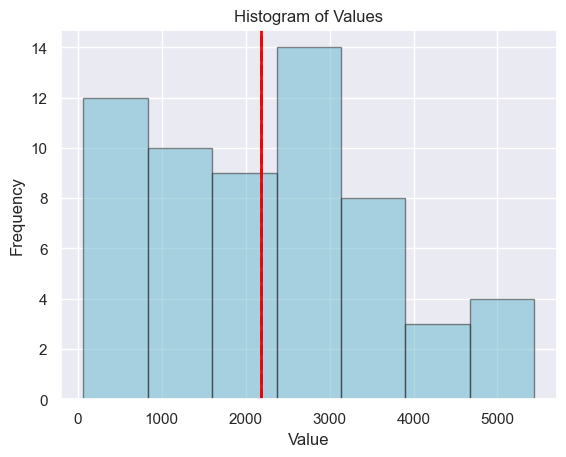

In [190]:
# Plotting the histogram
plt.hist(values, bins=7, color='c', edgecolor='k', alpha=0.50)
plt.axvline(values.mean(), color='k', linestyle='dashed', linewidth=2)  # Sample mean
plt.axvline(mu, color='red', linestyle='solid', linewidth=2)  # Population mean

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values')

## Interactive Visualization 

In [191]:
#dataset of the codes
country_codes = pd.read_csv("iso3.csv") 

In [192]:
country_codes.head() 


,iso3,name
0,BEL,Belgium
1,CH_,"China, mainland"
2,GGY,Guernsey
3,LUX,Luxembourg
4,TWN,"China, Taiwan Province of"


In [193]:
# Read the datasets
Exp_and_Imp = pd.read_csv('import_and_export.csv')
country_codes = pd.read_csv('iso3.csv')

# Merge the datasets based on the 'location' column in Exp_and_Imp and the 'name' column in country_codes
merged_datasets = pd.merge(Exp_and_Imp, country_codes, left_on='location', right_on='name')

# Print the merged dataset
print(merged_datasets)


          location      category     flow  \
0          Ireland  Construction  Exports   
1          Ireland  Construction  Exports   
2          Ireland  Construction  Exports   
3          Ireland  Construction  Exports   
4          Ireland  Construction  Exports   
5          Ireland  Construction  Exports   
6          Ireland  Construction  Exports   
7          Ireland  Construction  Exports   
8          Ireland  Construction  Exports   
9          Ireland  Construction  Exports   
10         Ireland  Construction  Imports   
11         Ireland  Construction  Imports   
12         Ireland  Construction  Imports   
13         Ireland  Construction  Imports   
14         Ireland  Construction  Imports   
15         Ireland  Construction  Imports   
16         Ireland  Construction  Imports   
17         Ireland  Construction  Imports   
18         Ireland  Construction  Imports   
19         Ireland  Construction  Imports   
20  United Kingdom  Construction  Exports   
21  United

In [194]:
#view the first 5 values
merged_datasets.head()

,location,category,flow,measure,Unit,Date,Value,iso3,name
0,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2012,69.379,IRL,Ireland
1,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2013,67.734,IRL,Ireland
2,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2014,79.710,IRL,Ireland
3,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2015,77.666,IRL,Ireland
4,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2016,76.376,IRL,Ireland


In [195]:
# Drop the columns 
merged_datasets = merged_datasets.drop(['Unit','name'],axis=1) 
merged_datasets.head() 


,location,category,flow,measure,Date,Value,iso3
0,Ireland,Construction,Exports,US Dollars at current prices in millions,2012,69.379,IRL
1,Ireland,Construction,Exports,US Dollars at current prices in millions,2013,67.734,IRL
2,Ireland,Construction,Exports,US Dollars at current prices in millions,2014,79.710,IRL
3,Ireland,Construction,Exports,US Dollars at current prices in millions,2015,77.666,IRL
4,Ireland,Construction,Exports,US Dollars at current prices in millions,2016,76.376,IRL


In [196]:
# Renaming the column names 

merged_datasets = merged_datasets.rename(columns={"Date":"Year","location":"Country","iso3":"code"})
merged_datasets.head()

,Country,category,flow,measure,Year,Value,code
0,Ireland,Construction,Exports,US Dollars at current prices in millions,2012,69.379,IRL
1,Ireland,Construction,Exports,US Dollars at current prices in millions,2013,67.734,IRL
2,Ireland,Construction,Exports,US Dollars at current prices in millions,2014,79.710,IRL
3,Ireland,Construction,Exports,US Dollars at current prices in millions,2015,77.666,IRL
4,Ireland,Construction,Exports,US Dollars at current prices in millions,2016,76.376,IRL


In [197]:
#graph the interactive visualization 
fig = px.choropleth(merged_datasets, 
                    locations="code",  # column containing country names
                    color="Value",  # column by which to color-code
                    hover_name="Country",  # column to display in hover information
                    animation_frame="Year", # column on which to animate 
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_geos(projection_type="natural earth")
fig.update_layout(
    title={
        'text': 'Exports and Imports in the Construction Sector by Country from 2012 to 2021 (US Dollars in millions)',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top',  
    }  
)

fig.show()

## Applying ML Models
## Linear regression

In [198]:
Exp_and_Imp = Exp_and_Imp.rename(columns={"Date":"Year","location":"Country"})



In [199]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Scaled columns 
selected_columns = ['Year', 'Value']
df_selected = Exp_and_Imp[selected_columns]

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the selected columns and create a new dataframe
df_scale = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns)


In [200]:
df_scale.head()

,Year,Value
0,-1.566699,-1.456267
1,-1.218544,-1.457402
2,-0.870388,-1.449139
3,-0.522233,-1.450549
4,-0.174078,-1.451439


**Seperating Dataset into Test and Train**

In [201]:
y = ['Value']
X =  df_scale.drop(['Value'],axis=1)

In [202]:
# Select the columns you want to scale and use as features
selected_features = ['Year']
X = df_scale[selected_features]

# Define the target variable
y = df_scale['Value']

In [203]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [204]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(48, 1)
(12, 1)
(48,)
(12,)


In [205]:
lrm = LinearRegression()
lrm.fit(X_train, Y_train) #fit an OLS model

LinearRegression()

In [206]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)  #making predictions

In [207]:
# making predictions
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, Y_test)))

y_preds_test = lrm.predict(X_test)
print("Root mean squared error of the prediction is: {}".format(np.sqrt(mean_squared_error(Y_test, y_preds_test))))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))


-----Test set statistics-----
R-squared of the model in the test set is: -0.0258859346735969
Root mean squared error of the prediction is: 1.0462442080937238
Mean absolute error of the prediction is: 0.7898413326348748
Mean absolute percentage error of the prediction is: 88.0847432979396


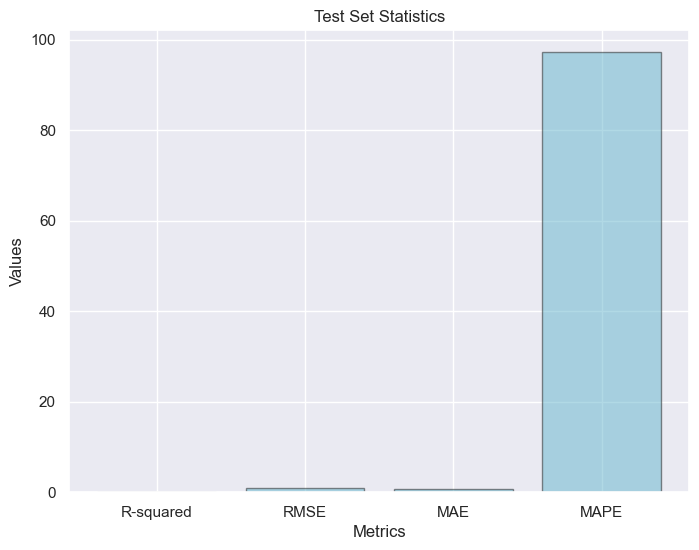

In [208]:

# Test set statistics
r_squared = 0.02669141182851753
rmse = 0.846683475659343
mae = 0.6984664682133382
mape = 97.21200016734475

# Plotting the test set statistics
metrics = ['R-squared', 'RMSE', 'MAE', 'MAPE']
values = [r_squared, rmse, mae, mape]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color='c', edgecolor='k', alpha=0.50)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Test Set Statistics')
plt.show()


## Cross Validation

In [209]:
cv_scores = cross_val_score(lrm, X, y, cv=10)  # Perform 5-fold cross-validation


In [210]:
print("Cross-validated scores:", cv_scores)
print("Mean cross-validated score:", cv_scores.mean())


Cross-validated scores: [-1.41505749e+05 -2.16655843e+01 -1.61029029e+01 -1.03505518e+00
 -8.18078550e+00 -6.82982241e-01 -3.89411116e+00 -1.94111151e+00
 -1.91665711e+00 -1.43089407e+00]
Mean cross-validated score: -14156.259917716594


## Decision Tree Regression

In [211]:
from sklearn import preprocessing


# encode categorical variables using Label Encoder

# select all categorical variables
df_categorical = Exp_and_Imp.select_dtypes(include=['object'])
df_categorical.head()

,Country,category,flow,measure,Unit
0,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars
1,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars
2,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars
3,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars
4,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars


In [212]:
# apply Label encoder to df_categorical

le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,Country,category,flow,measure,Unit
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [213]:
# concat df_categorical with original df
numerical_data = Exp_and_Imp.drop(df_categorical.columns, axis=1)
numerical_data = pd.concat([numerical_data, df_categorical], axis=1)
numerical_data.head()

,Year,Value,Country,category,flow,measure,Unit
0,2012,69.379,1,0,0,0,0
1,2013,67.734,1,0,0,0,0
2,2014,79.710,1,0,0,0,0
3,2015,77.666,1,0,0,0,0
4,2016,76.376,1,0,0,0,0


In [214]:
# look at column types
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      60 non-null     int64  
 1   Value     60 non-null     float64
 2   Country   60 non-null     int32  
 3   category  60 non-null     int32  
 4   flow      60 non-null     int32  
 5   measure   60 non-null     int32  
 6   Unit      60 non-null     int32  
dtypes: float64(1), int32(5), int64(1)
memory usage: 2.2 KB


In [215]:
# convert target variable income to categorical
numerical_data['Value'] = numerical_data['Value'].astype('category')

### Model Building and Evaluation

In [216]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [217]:
# Putting feature variable to X
X = numerical_data.drop('Value',axis=1)

# Putting response variable to y
y = numerical_data['Value']

In [218]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

,Year,Country,category,flow,measure,Unit
11,2013,1,0,1,0,0
44,2016,0,0,0,0,0
47,2019,0,0,0,0,0
33,2015,2,0,1,0,0
41,2013,0,0,0,0,0


In [219]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeRegressor


# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeRegressor(max_depth=5)
dt_default.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5)

In [220]:
#evaluation metrics of our default model

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred_default)
mae = mean_absolute_error(y_test, y_pred_default)
r2 = r2_score(y_test, y_pred_default)

# Printing the evaluation metrics
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("R-squared (R2): ", r2)


Mean Squared Error (MSE):  349141.5476783519
Mean Absolute Error (MAE):  374.8799074074075
R-squared (R2):  0.8544822789831161


## Plotting the Decision Tree

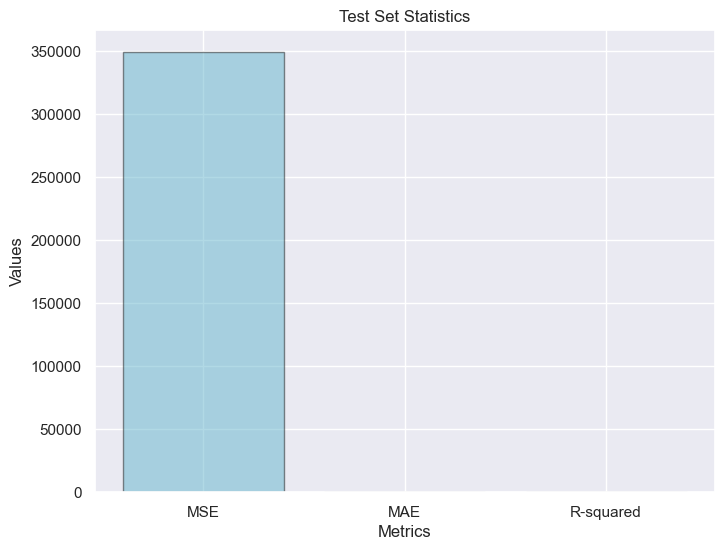

In [221]:

# Test set statistics
mse = 349141.5476783519
mae = 374.8799074074075
r_squared = 0.8544822789831161

# Plotting the test set statistics
metrics = ['MSE', 'MAE', 'R-squared']
values = [mse, mae, r_squared]


plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color='c', edgecolor='k', alpha=0.50)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Test Set Statistics')
plt.show()


### Hyperparameter Tuning

In [222]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their range of values to search
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Grid Search object
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid, cv=5)

# Fit the Grid Search object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameter values and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics and best hyperparameters
print("Best Hyperparameters:", best_params)
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("R-squared (R2): ", r2)


Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error (MSE):  741172.8135539016
Mean Absolute Error (MAE):  639.425725925926
R-squared (R2):  0.6910886732752979


In [223]:

# scores of GridSearchCV
scores = grid_search.cv_results_
scores_table = pd.DataFrame(scores)

# Display the scores table
print(scores_table)

# Check the mean value of Test Score
mean_test_score = scores_table['mean_test_score'].mean()
print("Mean Test Score:", mean_test_score)


    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.002403      0.000485         0.002828        0.002129   
1        0.004495      0.003753         0.003162        0.000926   
2        0.003385      0.001004         0.002044        0.000558   
3        0.002717      0.000397         0.002009        0.000015   
4        0.002529      0.000468         0.002104        0.000197   
5        0.002074      0.000981         0.002059        0.001046   
6        0.002333      0.001240         0.001302        0.000400   
7        0.001431      0.000385         0.001605        0.000487   
8        0.002540      0.001181         0.002814        0.000677   
9        0.002564      0.000504         0.002190        0.000457   
10       0.002596      0.000489         0.002221        0.000342   
11       0.003511      0.000981         0.002424        0.000792   
12       0.002288      0.000731         0.001748        0.000444   
13       0.002692      0.000580         0.001819

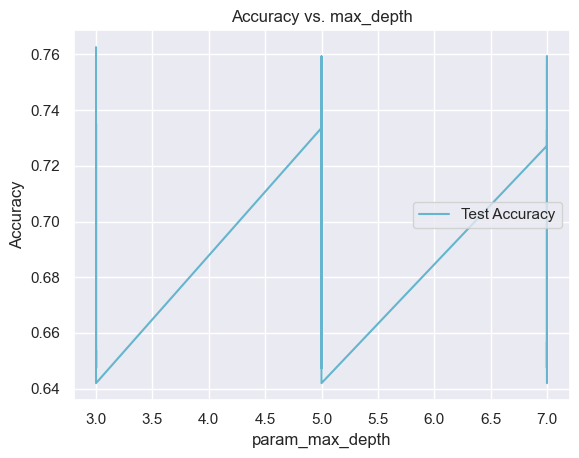

In [224]:
import matplotlib.pyplot as plt

# Plotting accuracies with param_max_depth
plt.figure()

plt.plot(scores_table["param_max_depth"], 
         scores_table["mean_test_score"], 
         label="Test Accuracy",
         color="c")
plt.xlabel("param_max_depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. max_depth")
plt.legend()
plt.show()


## GridSearch to Find Optimal Hyperparameters

In [225]:
X_train.shape

(42, 6)

In [226]:
y_train.shape

(42,)

In [227]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["mse", "mae"]
}

n_folds = 5

# Instantiate the decision tree regressor
dtree = DecisionTreeRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid,
                           cv=n_folds, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\Sandr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

C:\Users\Sandr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

C:\Users\Sandr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

C:\Users\Sandr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.

C:\Users\Sandr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning:

Criterion 'mse' was deprecated in v1.0 

C:\Users\Sandr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning:

Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.

C:\Users\Sandr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning:

Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.

C:\Users\Sandr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning:

Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.

C:\Users\Sandr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning:

Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.

C:\Users\Sandr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning:

Criterion 'mae' was deprecated in v

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [228]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004694,0.003505,0.002154,0.000679,mse,5,50,50,"{'criterion': 'mse', 'max_depth': 5, 'min_samp...",-0.366779,-0.062769,-0.792535,-0.485883,-1.011104,-0.543814,0.330552,1
1,0.002485,0.000602,0.002539,0.001340,mse,5,50,100,"{'criterion': 'mse', 'max_depth': 5, 'min_samp...",-0.366779,-0.062769,-0.792535,-0.485883,-1.011104,-0.543814,0.330552,1
2,0.002605,0.000490,0.002044,0.000334,mse,5,100,50,"{'criterion': 'mse', 'max_depth': 5, 'min_samp...",-0.366779,-0.062769,-0.792535,-0.485883,-1.011104,-0.543814,0.330552,1
3,0.002805,0.000398,0.001398,0.000486,mse,5,100,100,"{'criterion': 'mse', 'max_depth': 5, 'min_samp...",-0.366779,-0.062769,-0.792535,-0.485883,-1.011104,-0.543814,0.330552,1
4,0.002491,0.000419,0.001744,0.000421,mse,10,50,50,"{'criterion': 'mse', 'max_depth': 10, 'min_sam...",-0.366779,-0.062769,-0.792535,-0.485883,-1.011104,-0.543814,0.330552,1
5,0.004808,0.003126,0.002387,0.000958,mse,10,50,100,"{'criterion': 'mse', 'max_depth': 10, 'min_sam...",-0.366779,-0.062769,-0.792535,-0.485883,-1.011104,-0.543814,0.330552,1
6,0.002604,0.000488,0.002227,0.000464,mse,10,100,50,"{'criterion': 'mse', 'max_depth': 10, 'min_sam...",-0.366779,-0.062769,-0.792535,-0.485883,-1.011104,-0.543814,0.330552,1
7,0.006598,0.007526,0.001803,0.000747,mse,10,100,100,"{'criterion': 'mse', 'max_depth': 10, 'min_sam...",-0.366779,-0.062769,-0.792535,-0.485883,-1.011104,-0.543814,0.330552,1
8,0.002993,0.001405,0.002384,0.001014,mae,5,50,50,"{'criterion': 'mae', 'max_depth': 5, 'min_samp...",-0.454008,-0.054640,-0.889315,-0.504714,-1.539507,-0.688437,0.501015,9
9,0.003811,0.002035,0.002231,0.000400,mae,5,50,100,"{'criterion': 'mae', 'max_depth': 5, 'min_samp...",-0.454008,-0.054640,-0.889315,-0.504714,-1.539507,-0.688437,0.501015,9


In [229]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy -0.5438139891815819
DecisionTreeRegressor(criterion='mse', max_depth=5, min_samples_leaf=50,
                      min_samples_split=50)


In [230]:
from sklearn.tree import DecisionTreeRegressor

# Create and fit the decision tree regressor with optimal hyperparameters
clf = DecisionTreeRegressor(criterion='mse', max_depth=5, min_samples_leaf=50, min_samples_split=50)
clf.fit(X_train, y_train)


C:\Users\Sandr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.



DecisionTreeRegressor(criterion='mse', max_depth=5, min_samples_leaf=50,
                      min_samples_split=50)

In [231]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)


R-squared (R2) score: 0.6910886732752979


In [232]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from io import StringIO
import pydotplus
from IPython.display import Image

In [233]:

regressor = DecisionTreeRegressor(max_depth=5, random_state=0)
regressor.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, random_state=0)

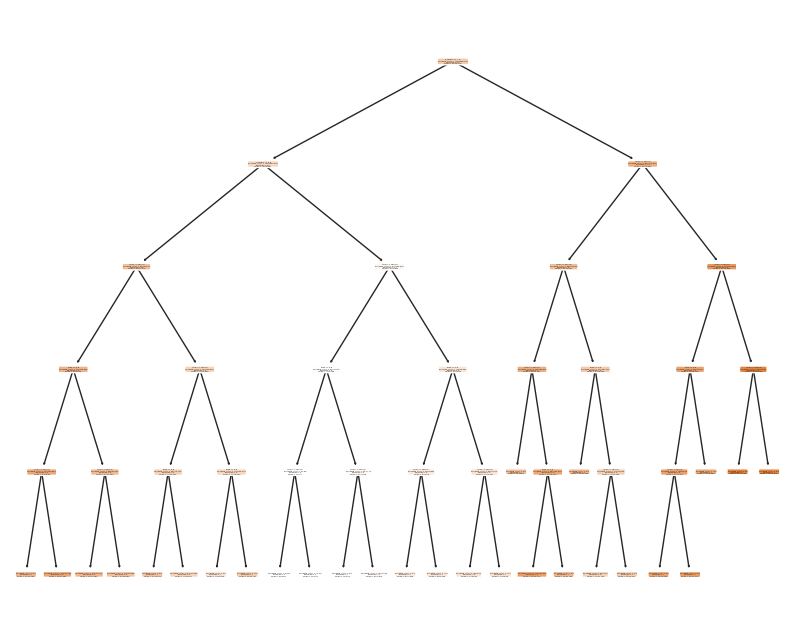

In [234]:
from sklearn import tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(10, 8))
tree.plot_tree(regressor, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()


In [235]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor with specified hyperparameters
regressor = DecisionTreeRegressor(random_state=100, max_depth=3, min_samples_leaf=50, min_samples_split=50)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Evaluate the model on the test data
score = regressor.score(X_test, y_test)
print(score)


-0.047164694156816456


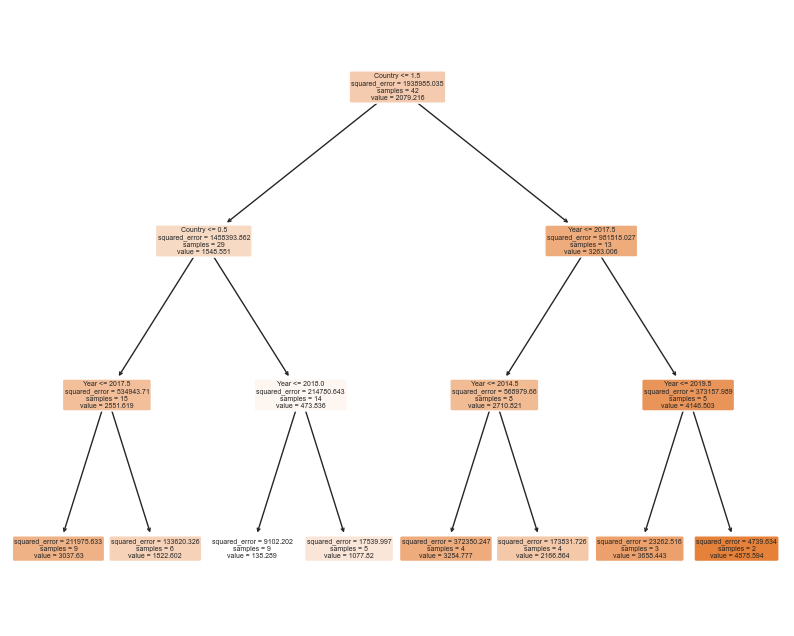

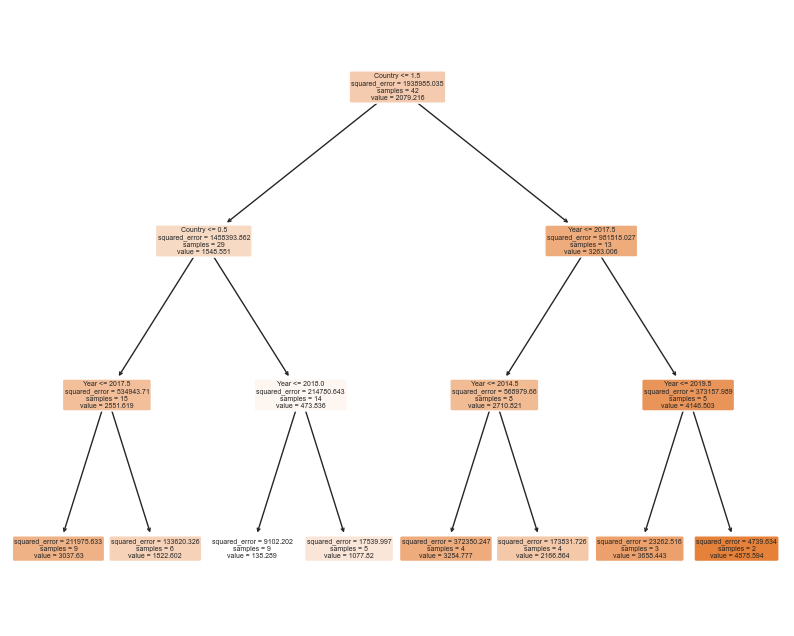

In [236]:
regressor = DecisionTreeRegressor(max_depth=3)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(10, 8))
tree.plot_tree(regressor, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()
# Plot the decision tree
plt.figure(figsize=(10, 8))
tree.plot_tree(regressor, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

In [237]:
# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the regression metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 741172.8135539016
Mean Absolute Error: 639.425725925926
R^2 Score: 0.6910886732752979


## Ridge Regression

In [238]:
# split into X and y
X = Exp_and_Imp.loc[:, ['Country','category','flow','Year']]

y = Exp_and_Imp['Value']

In [239]:
# creating dummy variables for categorical variables

# subset all categorical variables
Exp_categorical = X.select_dtypes(include=['object'])
Exp_categorical.head()

,Country,category,flow
0,Ireland,Construction,Exports
1,Ireland,Construction,Exports
2,Ireland,Construction,Exports
3,Ireland,Construction,Exports
4,Ireland,Construction,Exports


In [240]:
# convert into dummies
Exp_dummies = pd.get_dummies(Exp_categorical, drop_first=True)
Exp_dummies.head()

,Country_Ireland,Country_United Kingdom,flow_Imports
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [241]:
# drop categorical variables 
X = X.drop(list(Exp_categorical.columns), axis=1)

In [242]:
# concat dummy variables with X
X = pd.concat([X, Exp_dummies], axis=1)

In [243]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['Year', 'Country_Ireland', 'Country_United Kingdom', 'flow_Imports'], dtype='object')

In [244]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Model Building and Evaluation

In [245]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [246]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004516,0.001007,0.002907,0.002090,0.0001,{'alpha': 0.0001},-708.865169,-709.031519,-779.102757,-611.810942,...,-668.869654,85.319413,1,-574.301874,-587.658270,-555.202215,-617.922817,-624.993546,-592.015744,26.255348
1,0.003411,0.000479,0.002207,0.000403,0.001,{'alpha': 0.001},-708.864435,-709.032706,-779.104996,-611.815393,...,-668.874064,85.314780,2,-574.299707,-587.659101,-555.203450,-617.924256,-624.999184,-592.017140,26.256967
2,0.002807,0.000403,0.001405,0.000485,0.01,{'alpha': 0.01},-708.857099,-709.044550,-779.127405,-611.859877,...,-668.918144,85.268486,3,-574.278032,-587.667854,-555.215796,-617.938643,-625.055542,-592.031173,26.273144
3,0.002597,0.000797,0.001783,0.000387,0.05,{'alpha': 0.05},-708.824652,-709.096630,-779.227466,-612.057136,...,-669.113703,85.063428,4,-574.221312,-587.752974,-555.270404,-618.002442,-625.305491,-592.110524,26.338200
4,0.002052,0.000562,0.001908,0.000187,0.1,{'alpha': 0.1},-708.784447,-709.160447,-779.353598,-612.302678,...,-669.357350,84.808691,5,-574.176298,-587.859259,-555.338062,-618.081867,-625.616715,-592.214440,26.416075


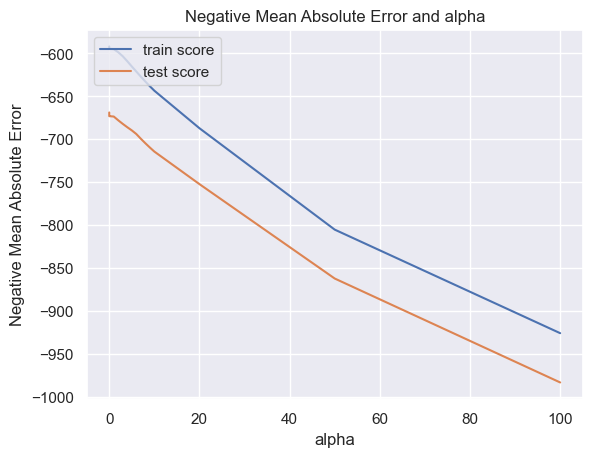

In [247]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [248]:
alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 128.31918919, -717.87175162,  352.50190361, -120.49823138])

## Plotting results

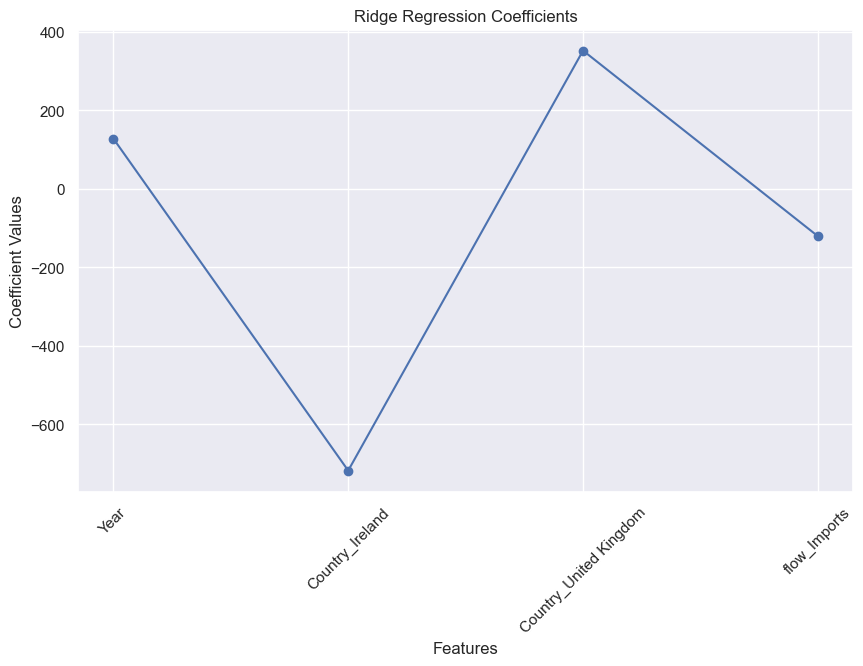

In [249]:

alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

# Obtain the coefficient values
coefficients = ridge.coef_

# names 
feature_names = X_train.columns 

# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.plot(feature_names, coefficients, marker='o')
plt.xlabel('Features')
plt.ylabel('Coefficient Values')
plt.title('Ridge Regression Coefficients')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
